<a href="https://colab.research.google.com/github/reysito12/concatenar_base_datos/blob/main/datos_colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Cargar los datos de 2006 a 2018
df_2006_2018 = pd.read_excel('/content/drive/MyDrive/COLOMBIA/datos/datos_2006_2018.xlsx')

# Cargar los datos de 2019 a 2024
df_2019_2024 = pd.read_excel('/content/drive/MyDrive/COLOMBIA/datos/datos_2019_2024.xlsx')

¡Éxito! El archivo 'datos_2006_2024.xlsx' ha sido guardado en: /content/drive/My Drive/COLOMBIA/datos/datos_2006_2024.xlsx


,CÓD. MUN.,DEPARTAMENTO,Área Cosechada\n(ha),Rendimiento\n(t/ha),NOMBRE \nCIENTIFICO,MUNICIPIO,CÓD. \nDEP.,Área Sembrada\n(ha),AÑO,Producción\n(t),PERIODO
0,15114,BOYACA,1.0,1.000000,BETA VULGARIS,BUSBANZA,15,2.0,2006,1.0,2006B
1,25754,CUNDINAMARCA,80.0,18.000000,BETA VULGARIS,SOACHA,25,82.0,2006,1440.0,2006B
2,25214,CUNDINAMARCA,1.5,17.333333,BETA VULGARIS,COTA,25,1.5,2006,26.0,2006B
3,54405,NORTE DE SANTANDER,3.0,16.000000,BETA VULGARIS,LOS PATIOS,54,3.0,2006,48.0,2006B
4,54518,NORTE DE SANTANDER,0.5,10.000000,BETA VULGARIS,PAMPLONA,54,0.5,2006,5.0,2006B


Cantidad de filas y columnas:
(351920, 11)
------------------------------
Cantidad de datos faltantes por columna:
CÓD. MUN.                  0
DEPARTAMENTO               0
Área Cosechada\n(ha)       0
Rendimiento\n(t/ha)     3558
NOMBRE \nCIENTIFICO     2983
MUNICIPIO                  0
CÓD. \nDEP.                0
Área Sembrada\n(ha)        0
AÑO                        0
Producción\n(t)            0
PERIODO                    0
dtype: int64
------------------------------
Cantidad de cultivos únicos:
374
------------------------------
Calculando los 10 cultivos con mayor área sembrada...


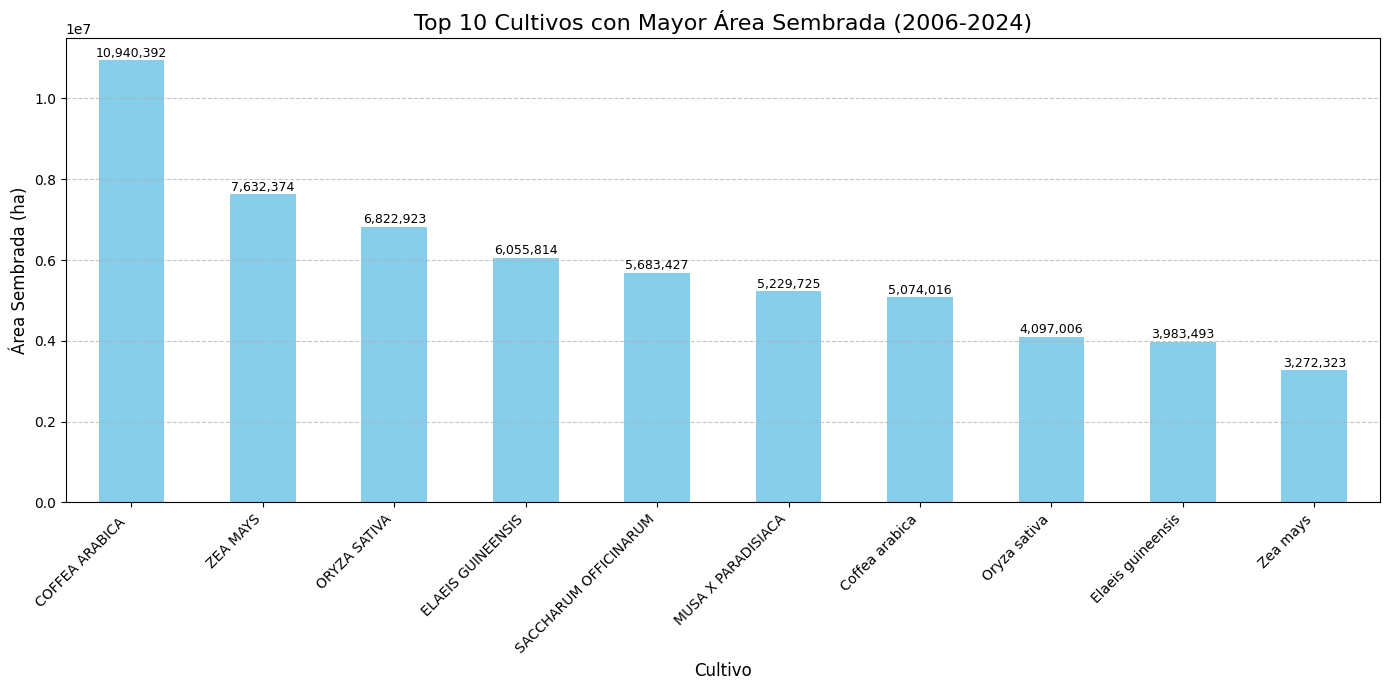

In [21]:
# --- 1. Cantidad de filas y columnas ---
print("Cantidad de filas y columnas:")
print(df_total.shape)
print("-" * 30)

# --- 2. Cantidad de datos faltantes por columna ---
print("Cantidad de datos faltantes por columna:")
print(df_total.isnull().sum())
print("-" * 30)

# --- 3. Cantidad de cultivos únicos ---
# Using 'NOMBRE \nCIENTIFICO' column to represent the crop name
if 'NOMBRE \nCIENTIFICO' in df_total.columns:
    print("Cantidad de cultivos únicos:")
    print(df_total['NOMBRE \nCIENTIFICO'].nunique())
    print("-" * 30)
else:
    print("Columna 'NOMBRE \nCIENTIFICO' no encontrada para contar cultivos únicos.")
    print("-" * 30)


# --- 4. Gráfico de los 10 cultivos con mayor área sembrada ---
# Assuming 'Área Sembrada\n(ha)' column represents sown area
if 'Área Sembrada\n(ha)' in df_total.columns and 'NOMBRE \nCIENTIFICO' in df_total.columns:
    print("Calculando los 10 cultivos con mayor área sembrada...")
    # Group by 'NOMBRE \nCIENTIFICO' and sum the sown area
    cultivos_area = df_total.groupby('NOMBRE \nCIENTIFICO')['Área Sembrada\n(ha)'].sum().sort_values(ascending=False)

    # Select the top 10
    top_10_cultivos_area = cultivos_area.head(10)

    # Create the bar chart with enhancements
    plt.figure(figsize=(14, 7)) # Increased figure size
    ax = top_10_cultivos_area.plot(kind='bar', color='skyblue') # Added color

    plt.title('Top 10 Cultivos con Mayor Área Sembrada (2006-2024)', fontsize=16) # Enhanced title
    plt.xlabel('Cultivo', fontsize=12) # Enhanced x-label
    plt.ylabel('Área Sembrada (ha)', fontsize=12) # Enhanced y-label
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotated and sized x-ticks
    plt.yticks(fontsize=10) # Sized y-ticks
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Added horizontal grid lines

    # Add data labels to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)


    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

else:
    print("Columnas 'Área Sembrada\\n(ha)' o 'NOMBRE \\nCIENTIFICO' no encontradas para el gráfico de área sembrada.")